<a href="https://colab.research.google.com/github/AadityaAdh/Image_augmentation/blob/main/augumentation_albumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#augumentation

augumentation garni yeuta technique ho albumentation



#what is augumentation

What is image augmentation and how it can improve the performance of deep neural networks¶

Deep neural networks require a lot of training data to obtain good results and prevent overfitting. However, it often very difficult to get enough training samples. Multiple reasons could make it very hard or even impossible to gather enough data:

To make a training dataset, you need to obtain images and then label them. For example, you need to assign correct class labels if you have an image classification task. For an object detection task, you need to draw bounding boxes around objects. For a semantic segmentation task, you need to assign a correct class to each input image pixel. This process requires manual labor, and sometimes it could be very costly to label the training data. For example, to correctly label medical images, you need expensive domain experts.

Sometimes even collecting training images could be hard. There are many legal restrictions for working with healthcare data, and obtaining it requires a lot of effort. Sometimes getting the training images is more feasible, but it will cost a lot of money. For example, to get satellite images, you need to pay a satellite operator to take those photos. To get images for road scene recognition, you need an operator that will drive a car and collect the required data.

#what is albumentation

"Albumentation" likely refers to "albumentations," a popular Python library for image augmentation. Image augmentation involves applying various transformations to images, such as rotation, scaling, flipping, and changes in brightness and contrast. This process is commonly used in computer vision and machine learning tasks to artificially increase the size of the training dataset, which can improve the generalization and robustness of machine learning models.



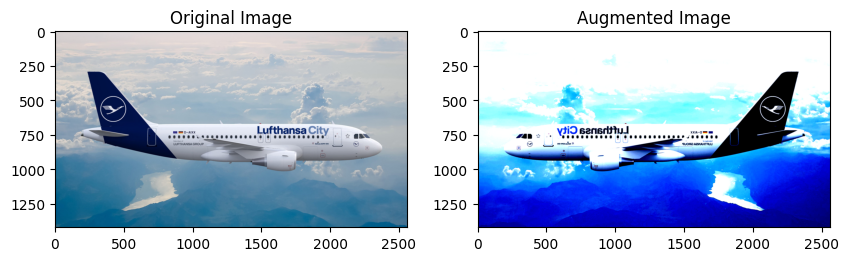

In [2]:
import cv2
import albumentations as A
from matplotlib import pyplot as plt

# Load a sample image
image = cv2.imread("/content/lufthansa.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define a simple augmentation pipeline
transform = A.Compose([
    A.RandomRotate90(),
    A.HorizontalFlip(),
    A.Normalize(),
])

# Apply the transformations
augmented_image = transform(image=image)['image']

# Plot the original and augmented images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(augmented_image)
ax[1].set_title('Augmented Image')

plt.show()


The A.Compose with the specified transformations (A.RandomRotate90(), A.HorizontalFlip(), A.Normalize()) will apply these transformations sequentially to a single input image. Therefore, it will produce only one augmented image.

#yedhi lastai dherai generate garna man lagae loop lagayae ra

#yedi timlae diya image ma kailae kunai transformation use garni kailae na garni gare re dherai image generate garnu pare:

probability ko use garni
if p=0.3 then it will use that transformation 30% of the time

so p=0.3 use gare ra loop garyo vanae  kunai image ma yo transformation vako hunxa kunai ma hudaina so variety of image aauxa

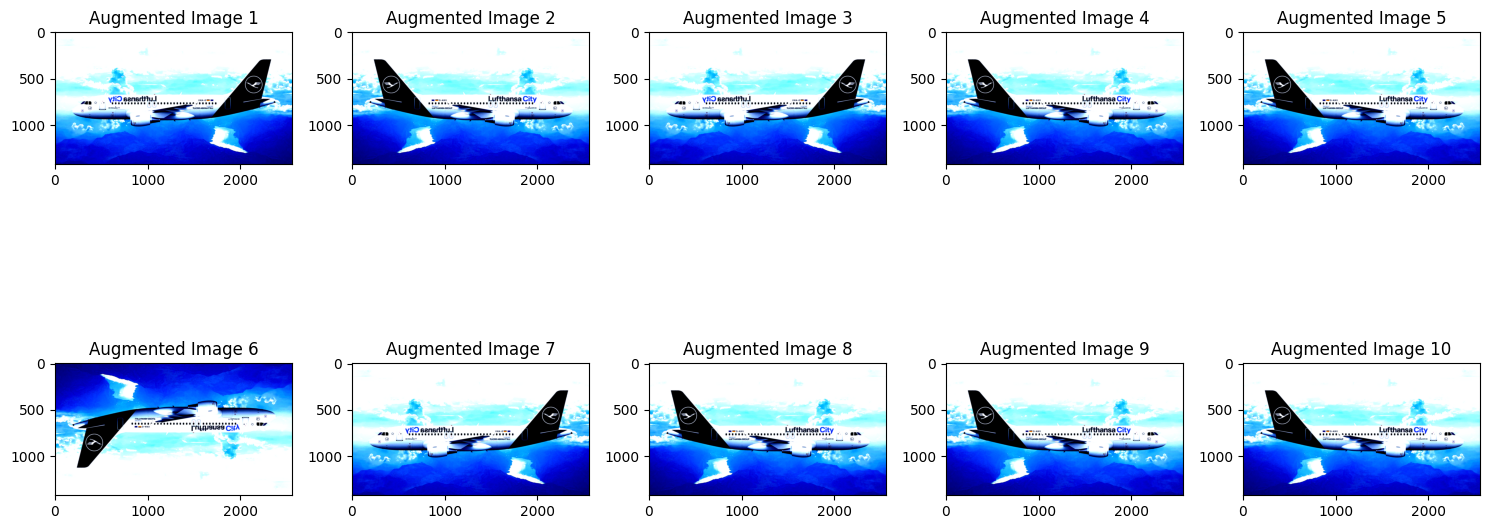

In [3]:
import cv2
import albumentations as A
from matplotlib import pyplot as plt
import random

# Load a sample image
image = cv2.imread("/content/lufthansa.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define a more complex augmentation pipeline with probabilities
transform = A.Compose([
    A.RandomRotate90(p=0.3),
    A.HorizontalFlip(p=0.3),
    A.Normalize(),
])

# Number of augmented images to generate
num_augmented_images = 10

# Generate and display augmented images
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for i in range(num_augmented_images):
    augmented = transform(image=image)
    augmented_image = augmented['image']

    # Plot the augmented images
    axes[i // 5, i % 5].imshow(augmented_image)
    axes[i // 5, i % 5].set_title(f'Augmented Image {i+1}')

plt.tight_layout()
plt.show()


#bounding box in albumentaions

timro original image ko bounding box ko coordinates haru timi sanga hunxa

aaba yo image ma albumentaion garda ni bounding box lai jasta ko testai rakhnu ta vayae na

so yesma bounding box ni pathaunu parxa aani yeslae bounding box coordinates pani tei transformation aanusar change gardinxa

note your bounding box are in format

[xmin,ymin,xmax,y,max] like [100,200,400,500]

yesto xa vanae yini haru lai albumentation ma pathaunu vanda aagadi normalized form ma lyaunu parxa

it can be done by

To normalize values, we divide coordinates in pixels for the x- and y-axis by the width and the height of the image.

timro original image ko height ra width herni aani tyo valu lae divide gare xi normalized hunxa

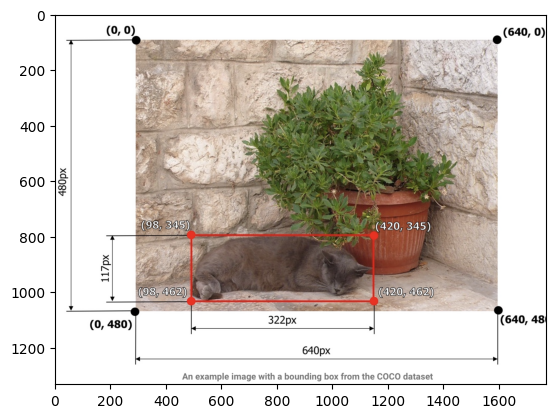

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the paths to your images
image_path1 = "/content/bbox.png"
image_path2 = "/content/bbox_one.png"

# Read the images using matplotlib.image
img1 = mpimg.imread(image_path1)
img2 = mpimg.imread(image_path2)

plt.imshow(img1)
plt.show()


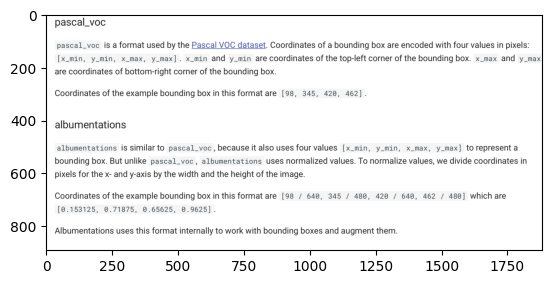

In [6]:
plt.imshow(img2)
plt.show()

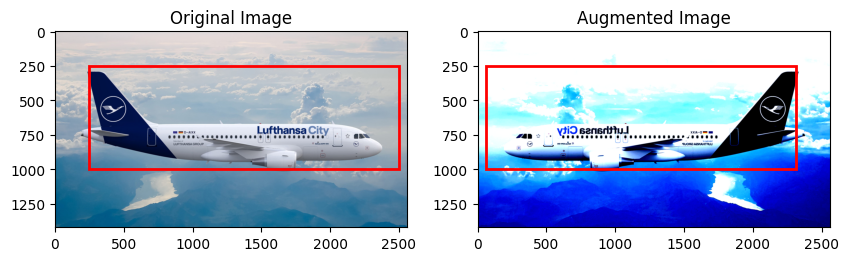

In [12]:
import cv2
import albumentations as A
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# Sample image and bounding box coordinates
image = cv2.imread("/content/lufthansa.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Original bounding box coordinates in [x_min, y_min, x_max, y_max] format
original_bbox = [250, 250, 2500, 1000]

# Normalize the bounding box coordinates to [0.0, 1.0]
height, width, _ = image.shape
normalized_bbox = [
    original_bbox[0] / width,
    original_bbox[1] / height,
    original_bbox[2] / width,
    original_bbox[3] / height
]

# Define a transformation with bounding box augmentation
transform = A.Compose([
    A.RandomRotate90(),
    A.HorizontalFlip(),
    A.Normalize(),
], bbox_params=A.BboxParams(format='albumentations', label_fields=['class_labels']))

# Apply the transformations to the image and normalized bounding box
augmented = transform(image=image, bboxes=[normalized_bbox], class_labels=[0])

# Extract augmented image and denormalized bounding box coordinates
augmented_image = augmented['image']
augmented_normalized_bbox = augmented['bboxes'][0]

# Denormalize the bounding box coordinates to the original image size
augmented_bbox = [
    augmented_normalized_bbox[0] * width,
    augmented_normalized_bbox[1] * height,
    augmented_normalized_bbox[2] * width,
    augmented_normalized_bbox[3] * height
]
#aagadi j le divide garya thyo teslae multiply gare ko

# Plot the original and augmented images with bounding boxes
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].add_patch(Rectangle((original_bbox[0], original_bbox[1]), original_bbox[2] - original_bbox[0], original_bbox[3] - original_bbox[1], linewidth=2, edgecolor='r', facecolor='none'))
ax[0].set_title('Original Image')

ax[1].imshow(augmented_image)
ax[1].add_patch(Rectangle((augmented_bbox[0], augmented_bbox[1]), augmented_bbox[2] - augmented_bbox[0], augmented_bbox[3] - augmented_bbox[1], linewidth=2, edgecolor='r', facecolor='none'))
ax[1].set_title('Augmented Image')

plt.show()


#so we can see bounding box ni tya aaplied vako transformation aanusar nai change hunxa

yedi diye na vanae sabbai manually yek yek herdai garnu parxa so do this



#yesko kaam yeti matrai haina image lai bounding box lai ra label lai yeutai variable ma combine gare ra rakhdinxa

bbox_params=A.BboxParams(format='albumentations', label_fields=['class_labels']))

class_label vanni variable ma mero label ko value xa hai vanae ra declare gare ko



augmented = transform(image=image, bboxes=[normalized_bbox], class_labels=[0])

aani yesbata chai class_label ko value pass gare ko



In [14]:
#dictionary ma image bounding box ra label halae ra return hunxa ie:
type(augmented)

dict

In [15]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [16]:
#then access as you like